In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = '/content/dataset.csv'

In [ ]:
!ls /content/gdrive/My Drive/dataset.csv

ls: cannot access '/content/gdrive/My': No such file or directory
ls: cannot access 'Drive/dataset.csv': No such file or directory


In [ ]:
import pandas as pd

In [ ]:
sales_df_train_1 = pd.read_csv('/content/dataset.csv')

In [ ]:
sales_df_train_1.head()

,date,st_id,pr_sku_id,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub,price,year,...,pr_group_id,pr_cat_id,pr_subcat_id,pr_uom_id,st_city_id,st_division_code,st_type_format_id,st_type_loc_id,st_type_size_id,st_is_active
0,2022-08-01,f7e6c85504ce6e82442c770f7c8606f0,ca4c5a242147c851906ae4fd6320a4d4,0,3.0,0.0,77.0,0.0,25.666667,2022.0,...,c74d97b01eae257e44aa9d5bade97baf,1bc0249a6412ef49b07fe6f62e6dc8de,ca34f669ae367c87f0e75dcae0f61ee5,17.0,3202111cf90e7c816a472aaceb72b0df,32586311f16876abf92901085bd87b99,1.0,1.0,12.0,1.0
1,2022-08-01,16a5cdae362b8d27a1d8f8c7b78b4330,5b26f85ccb23039364226f66f0366c66,1,2.0,2.0,25.0,25.0,12.500000,2022.0,...,c74d97b01eae257e44aa9d5bade97baf,c559da2ba967eb820766939a658022c8,8ec316a6bd7240d74c0567a1d9b311e5,17.0,c1f75cc0f7fe269dd0fd9bd5e24f9586,296bd0cc6e735f9d7488ebc8fbc19130,1.0,2.0,8.0,1.0
2,2022-08-01,42a0e188f5033bc65bf8d78622277c4e,65ebd984baa08be2dcd09ff15c254fdb,1,8.0,8.0,1166.0,1166.0,145.750000,2022.0,...,c20ad4d76fe97759aa27a0c99bff6710,fb2fcd534b0ff3bbed73cc51df620323,ee7d94b81244a5f3b392d4113bacf408,1.0,b8b4b727d6f5d1b61fff7be687f7970f,da742b3cfca5388aaf9af28a726a3c30,1.0,1.0,12.0,1.0
3,2022-08-01,fa7cdfad1a5aaf8370ebeda47a1ff1c3,dd58fb957a4cf683ad786792f9e8eec9,0,3.0,0.0,668.0,0.0,222.666667,2022.0,...,6512bd43d9caa6e02c990b0a82652dca,e58cc5ca94270acaceed13bc82dfedf7,c93c26cd49ea08e6b8984351d4164575,1.0,885fe656777008c335ac96072a45be15,296bd0cc6e735f9d7488ebc8fbc19130,1.0,1.0,12.0,1.0
4,2022-08-01,c81e728d9d4c2f636f067f89cc14862c,c24c65259d90ed4a19ab37b6fd6fe716,1,50.0,50.0,8096.0,8096.0,161.920000,2022.0,...,6512bd43d9caa6e02c990b0a82652dca,b59c67bf196a4758191e42f76670ceba,a09fe216278f103e70a7a179e173831c,1.0,908c9a564a86426585b29f5335b619bc,429a86ff6336c144ddaf6144f52ab52c,1.0,1.0,8.0,1.0


In [ ]:
sales_df_train_1 = sales_df_train_1.set_index('date')

In [ ]:
features = sales_df_train_1.drop(['pr_sales_in_units'], axis=1)
target = sales_df_train_1['pr_sales_in_units']

In [ ]:
from sklearn.model_selection import train_test_split
feat_train, feat_test, target_train, target_test = train_test_split(features, target, test_size=0.25, shuffle=False)

In [ ]:
cat_cols = sales_df_train_1.select_dtypes(include='object')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder().fit(feat_train[cat_cols.columns])
feat_train[cat_cols.columns] = ord_enc.transform(feat_train[cat_cols.columns])
feat_test[cat_cols.columns] = ord_enc.fit_transform(feat_test[cat_cols.columns])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(feat_train)
feat_train = scaler.transform(feat_train)
feat_test = scaler.transform(feat_test)

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 1
n_features= feat_train.shape[1]
generator = TimeseriesGenerator(feat_train, target_train, length=n_input, batch_size=1)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from tensorflow import keras

In [ ]:
n_steps=14
n_features=1

In [ ]:
feat_train.shape

(18369, 23)

In [ ]:
feat_train = feat_train.reshape(feat_train.shape[0], feat_train.shape[1], n_features)

In [ ]:
target_train = np.array(target_train)

In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(feat_train.shape[1], n_features), return_sequences=True))
#lstm_model.add(Dropout(0.1))
lstm_model.add(LSTM(32, activation='relu'))
#lstm_model.add(Dropout(0.1))
#lstm_model.add(LSTM(32, activation='relu'))
#lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
lstm_model.fit(feat_train, target_train,  epochs=20)

Epoch 1/20
575/575 [==============================] - 53s 84ms/step - loss: 86.4880 - mae: 4.3182
Epoch 2/20
575/575 [==============================] - 52s 90ms/step - loss: 72.6845 - mae: 4.0710
Epoch 3/20
575/575 [==============================] - 50s 88ms/step - loss: 67.1996 - mae: 3.9306
Epoch 4/20
575/575 [==============================] - 48s 84ms/step - loss: 57.7279 - mae: 3.5438
Epoch 5/20
575/575 [==============================] - 50s 87ms/step - loss: 39.5212 - mae: 2.7097
Epoch 6/20
575/575 [==============================] - 48s 84ms/step - loss: 75.2229 - mae: 3.8981
Epoch 7/20
575/575 [==============================] - 51s 90ms/step - loss: 32.2803 - mae: 2.5631
Epoch 8/20
575/575 [==============================] - 51s 88ms/step - loss: 22.0946 - mae: 2.1281
Epoch 9/20
575/575 [==============================] - 49s 85ms/step - loss: 12.2413 - mae: 1.6839
Epoch 10/20
575/575 [==============================] - 50s 88ms/step - loss: 12.7933 - mae: 1.6863
Epoch 11/20
575/575

In [ ]:
target_test

date
2022-08-09     6.0
2022-08-09    16.0
2022-08-09     2.0
2022-08-09    22.0
2022-08-09    31.0
              ... 
2022-08-12    10.0
2022-08-12     3.0
2022-08-12     2.0
2022-08-12     5.0
2022-08-12     3.0
Name: pr_sales_in_units, Length: 6124, dtype: float64

In [ ]:
pred = lstm_model.predict(feat_test)

192/192 [==============================] - 2s 8ms/step


In [ ]:
res = target_test.to_frame()

In [ ]:
pred[:-1]

array([[8.047745 ],
       [3.2428045],
       [0.7421061],
       ...,
       [1.242889 ],
       [1.0983908],
       [1.1600406]], dtype=float32)

In [ ]:
res['Pred'] = pred

In [ ]:
res

,pr_sales_in_units,Pred
date,,
2022-08-09,6.0,7.730198
2022-08-09,16.0,17.078648
2022-08-09,2.0,2.089826
2022-08-09,22.0,24.721027
2022-08-09,31.0,33.226536
...,...,...
2022-08-12,10.0,10.373516
2022-08-12,3.0,3.038153
2022-08-12,2.0,1.911488


In [ ]:
import seaborn as sns

<Axes: xlabel='date'>

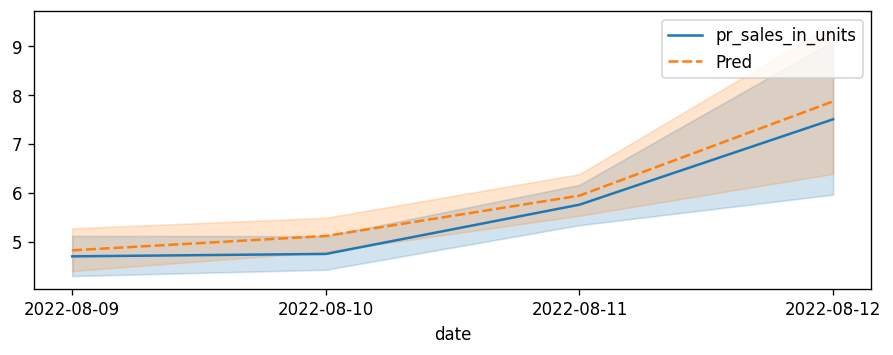

In [ ]:
sns.lineplot(res)

In [ ]:
def wape(y_true: np.array, y_pred: np.array):
    return np.sum(np.abs(y_true-y_pred))/np.sum(np.abs(y_true))

In [ ]:
wape(res['pr_sales_in_units'], res['Pred'])

0.1109465966794181